In [1]:
from imgAug import *
from matplotlib.pyplot import imsave, imshow
import imageio
import imgaug as ia

img = imageio.imread("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")
bs = [
    ia.BoundingBox(label=1, x1=100., y1=110., x2=400., y2=410),
    ia.BoundingBox(label=0, x1=250., y1=250., x2=280., y2=280)
]  # 1=face , 0=eye

# bb_path='/prj/nowage/ImgAugWithSR/imgs/HardHatSample__small/labels/000004_jpg.rf.8f0984ca266ad0bb1ccce4a3dc095291.txt'
# bbs=pd.read_csv(bb_path,sep=" ", header=None)

# img_path='/prj/nowage/ImgAugWithSR/imgs/HardHatSample__small/images/000004_jpg.rf.8f0984ca266ad0bb1ccce4a3dc095291.jpg'
# img = imageio.imread(img_path)
basePath="/prj/nowage/ImgAugWithSR/imgs/HardHatSample__small/"
images_path         = basePath + "images/"
images_resized_path = basePath + "images_resized/"
images_cropped_path = basePath + "images_cropped/"
images_super_path   = basePath + "images_super/"
images_chopped_path = basePath + "images_chopped/"

labels_path         = basePath + "labels/"
labels_resized_path = basePath + "labels_resized/"
labels_super_path   = basePath + "labels_super/"
labels_chopped_path = basePath + "labels_chopped/"# !ls {images_path}


# imgAugResize

BoundingBox(x1=39.0625, y1=42.9688, x2=156.2500, y2=160.1562, label=1)
BoundingBox(x1=97.6562, y1=97.6562, x2=109.3750, y2=109.3750, label=0)
(200, 200, 3)


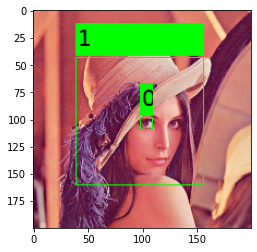

In [2]:
imgAndBb = imgAugResize(img, bs, 200, True)
for i in imgAndBb[1]:
    print(i)
imshow(imgAndBb[0])

print(imgAndBb[0].shape)

# bbsImgAugToBbsYolo5

In [10]:
bbs=bbsImgAugToBbsYolo5(img, bs)
bbs

,0,1,2,3,4
0,1,0.488281,0.507812,0.585938,0.585938
1,0,0.517578,0.517578,0.058594,0.058594


# bbsYolo5ToBbsImgAug

In [4]:
for r in bbs.iterrows():
    print(r[1])

0    1.000000
1    0.488281
2    0.507812
3    0.585938
4    0.585938
Name: 0, dtype: float64
0    0.000000
1    0.517578
2    0.517578
3    0.058594
4    0.058594
Name: 1, dtype: float64


In [5]:
bbsImgAug = bbsYolo5ToBbsImgAug(img, bbs)
print(bbsImgAug)


[BoundingBox(x1=100.0000, y1=110.0000, x2=400.0000, y2=410.0000, label=1), BoundingBox(x1=250.0000, y1=250.0000, x2=280.0000, y2=280.0000, label=0)]


# addBoudingBox

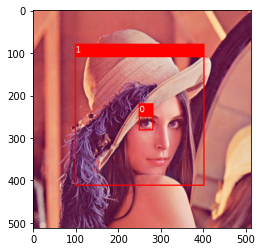

In [6]:
imshow(addBoudingBox(img,bbs))

# imgAugCropTo9

[BoundingBox(x1=0.0000, y1=0.0000, x2=220.0000, y2=220.0000, label=1), BoundingBox(x1=104.0000, y1=104.0000, x2=134.0000, y2=134.0000, label=0)]
[BoundingBox(x1=0.0000, y1=0.0000, x2=108.0000, y2=118.0000, label=1)]
[BoundingBox(x1=0.0000, y1=0.0000, x2=108.0000, y2=220.0000, label=1)]
[BoundingBox(x1=0.0000, y1=110.0000, x2=108.0000, y2=220.0000, label=1)]
[BoundingBox(x1=0.0000, y1=0.0000, x2=220.0000, y2=118.0000, label=1)]
[BoundingBox(x1=0.0000, y1=110.0000, x2=220.0000, y2=220.0000, label=1)]
[BoundingBox(x1=100.0000, y1=0.0000, x2=220.0000, y2=118.0000, label=1)]
[BoundingBox(x1=100.0000, y1=0.0000, x2=220.0000, y2=220.0000, label=1)]
[BoundingBox(x1=100.0000, y1=110.0000, x2=220.0000, y2=220.0000, label=1)]


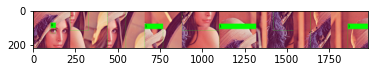

In [7]:
imgAndBb = imgAugCropTo9(img, bs, True, 220)
for i in imgAndBb[1]:
    print(i)
imshow(np.hstack(imgAndBb[0]))


# resizeImageBatch

In [8]:
resizeImageBatch(
    images_path,
    images_resized_path,
    labels_path,
    labels_resized_path,
    300
)


# imgAugCropTo9Batch

In [21]:
imgAugCropTo9Batch(
        images_super_path,
        labels_super_path,
        images_chopped_path,
        labels_chopped_path
)


400 [BoundingBox(x1=125.0000, y1=260.0000, x2=212.0000, y2=371.0000, label=1), BoundingBox(x1=326.0000, y1=0.0000, x2=400.0000, y2=41.0000, label=1)]
400 []


UnboundLocalError: local variable 'df_bbsYolo5' referenced before assignment

# imgCrop

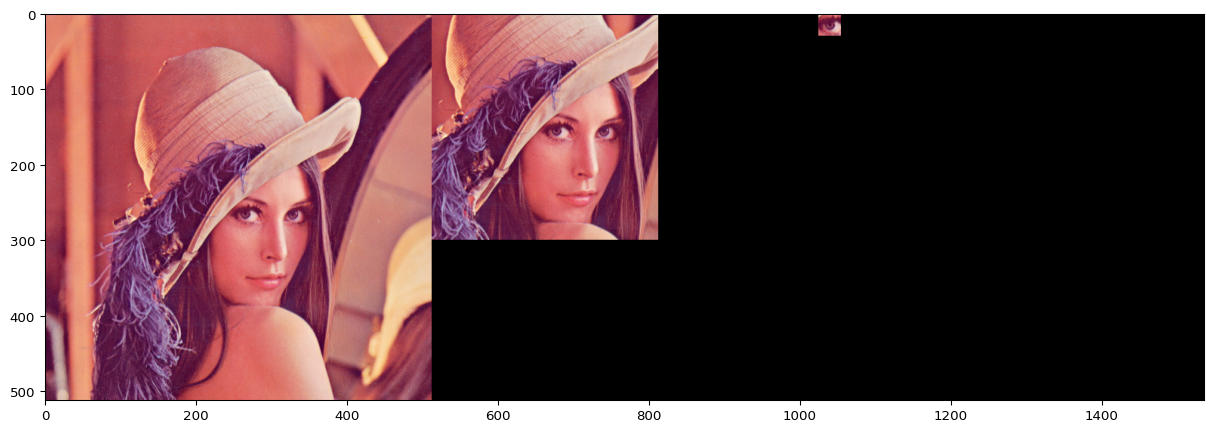

In [12]:
imgs=imgCrop(img,bs)
imgs.insert(0,img)
ia.imshow(ia.draw_grid(imgs, cols=3, rows=1))


# cropImageBatch

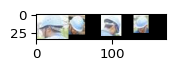

4


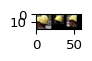

3


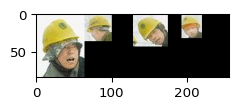

4


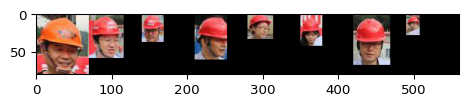

8


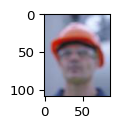

1


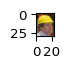

1


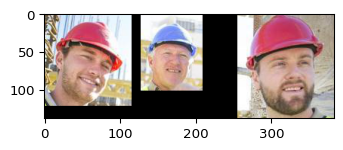

3


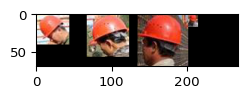

4


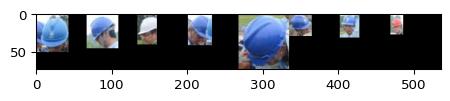

8


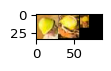

3


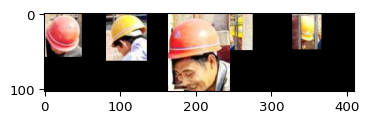

5


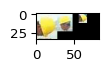

3


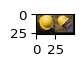

2


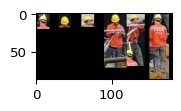

6


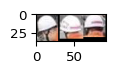

3


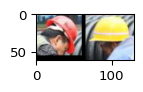

2


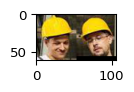

2


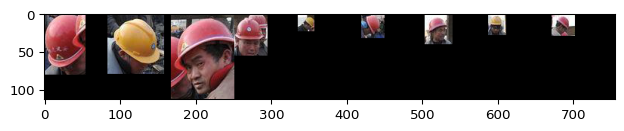

9


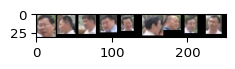

9


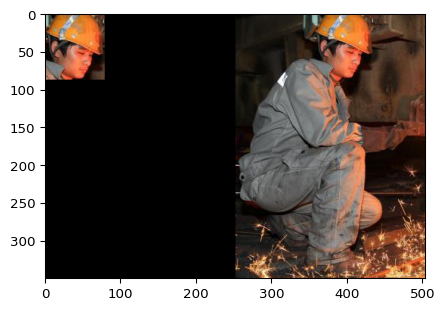

2


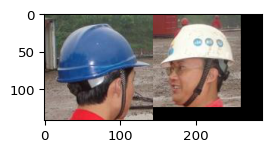

2


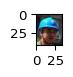

1


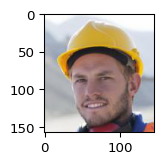

1


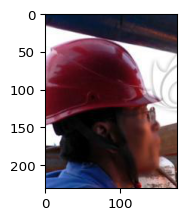

1


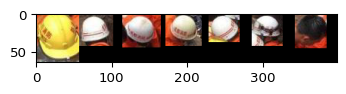

7


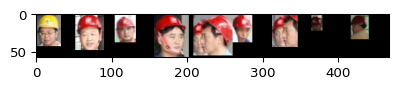

9


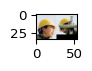

2


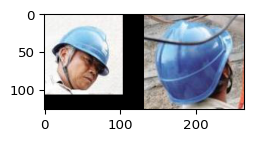

2


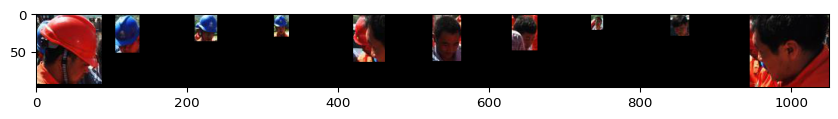

10


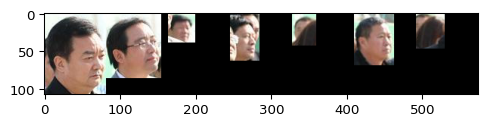

7


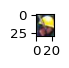

1


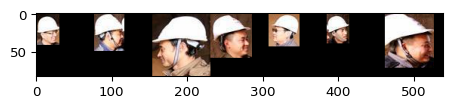

7


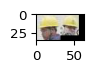

2


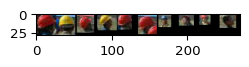

10


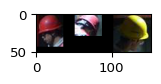

3


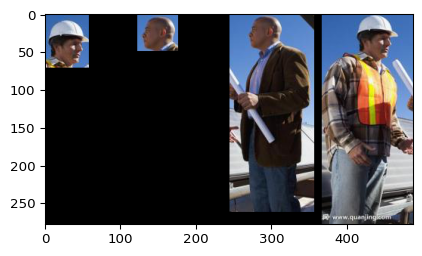

4


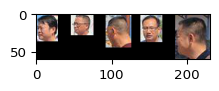

5


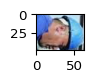

1


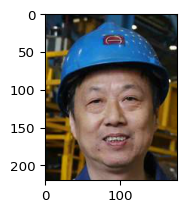

1


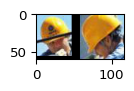

2


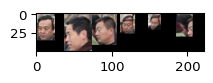

6


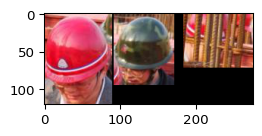

3


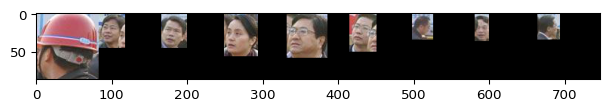

9


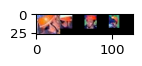

4


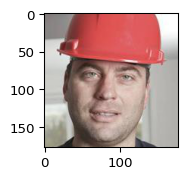

1


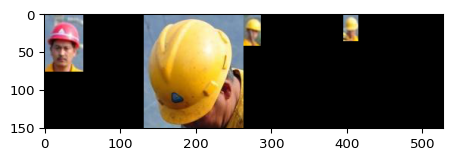

4


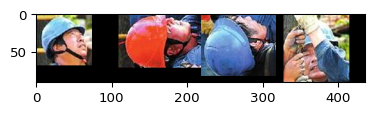

4


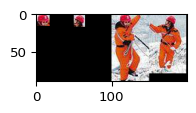

4


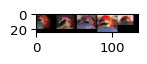

5


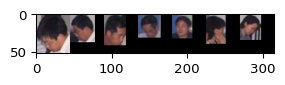

7


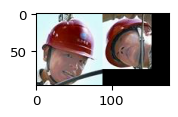

2


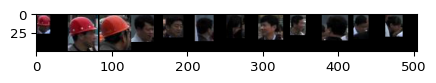

12


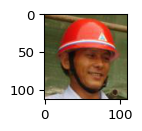

1


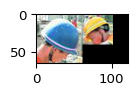

2


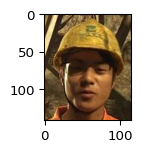

1


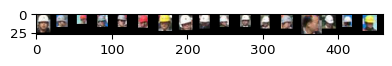

17


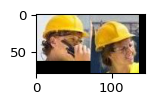

2


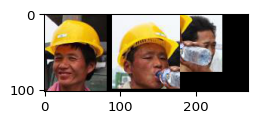

3


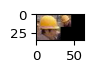

2


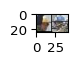

2


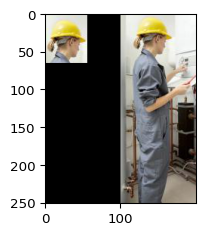

2


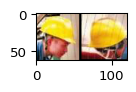

2


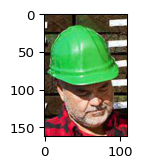

1


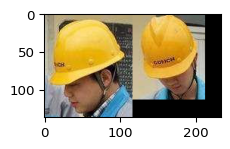

2


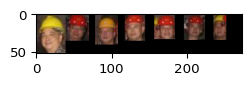

7


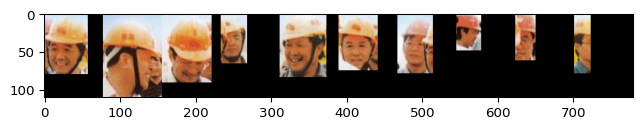

10


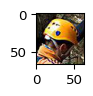

1


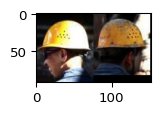

2


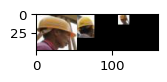

3


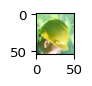

1


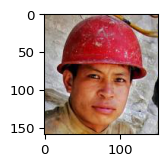

1


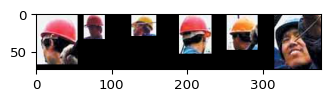

6


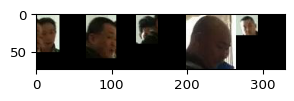

5


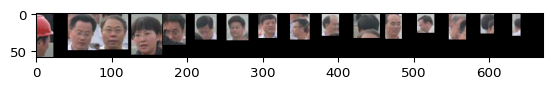

16


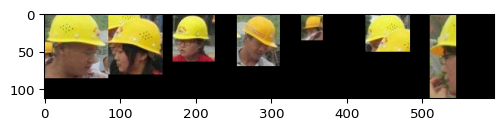

7


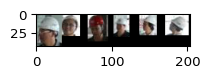

6


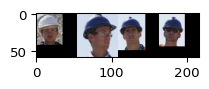

4


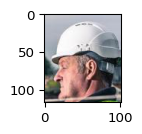

1


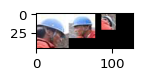

3


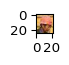

1


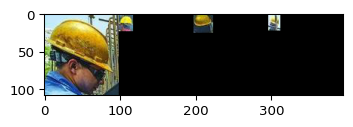

4


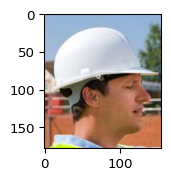

1


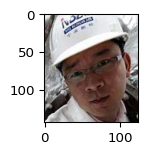

1


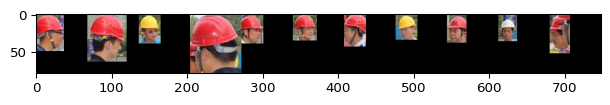

11


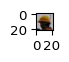

1


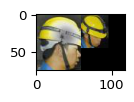

2


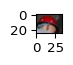

1


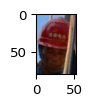

1


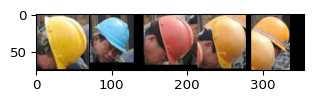

5


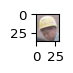

1


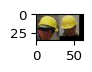

2


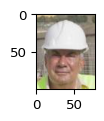

1


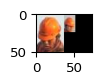

2


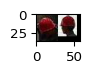

2


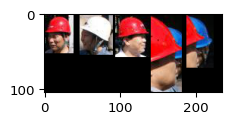

5


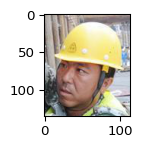

1


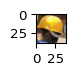

1


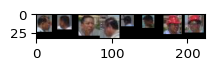

8


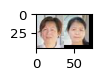

2


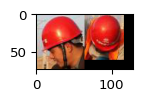

2
000001_jpg.rf.45fd629cae669b7236f4f5484605be64-0.jpg
000001_jpg.rf.45fd629cae669b7236f4f5484605be64-1.jpg
000002_jpg.rf.14c099486ff0a2df2d20d82da93b46f5-0.jpg
000002_jpg.rf.14c099486ff0a2df2d20d82da93b46f5-1.jpg
000003_jpg.rf.da4ac3b48b7a600add2281eacaf7dd82-0.jpg
000003_jpg.rf.da4ac3b48b7a600add2281eacaf7dd82-1.jpg
000003_jpg.rf.da4ac3b48b7a600add2281eacaf7dd82-2.jpg
000003_jpg.rf.da4ac3b48b7a600add2281eacaf7dd82-3.jpg
000004_jpg.rf.8f0984ca266ad0bb1ccce4a3dc095291-0.jpg
000004_jpg.rf.8f0984ca266ad0bb1ccce4a3dc095291-1.jpg
000004_jpg.rf.8f0984ca266ad0bb1ccce4a3dc095291-2.jpg
000004_jpg.rf.8f0984ca266ad0bb1ccce4a3dc095291-3.jpg
000004_jpg.rf.8f0984ca266ad0bb1ccce4a3dc095291-4.jpg
000004_jpg.rf.8f0984ca266ad0bb1ccce4a3dc095291-5.jpg
000005_jpg.rf.b5cf39466979e5caca32c370a42c10a1-0.jpg
000005_jpg.rf.b5cf39466979e5caca32c370a42c10a1-1.jpg
000006_jpg.rf.bb8c1e53f96b504e903ed949ab36d897-0.jpg
000006_jpg.rf.bb8c1e53f96b504e903ed949ab36d897-1.jpg
000006_jpg.rf.bb8c1e53f96b504e903ed949ab36d8

In [16]:
cropImageBatch(images_path,images_cropped_path,labels_path,preview=True)
!ls {images_cropped_path}
# 수동으로 images_cropped_hh, images_cropped_noHh 폴더에 분류할 것

# Working Area

In [17]:
# 
from imgAug import *
from matplotlib.pyplot import imsave, imshow
import imageio
import imgaug as ia

img = imageio.imread("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")
bs = [
    ia.BoundingBox(label=1, x1=100., y1=110., x2=400., y2=410),
    ia.BoundingBox(label=0, x1=250., y1=250., x2=280., y2=280)
]  # 1=face , 0=eye

# bb_path='/prj/nowage/ImgAugWithSR/imgs/HardHatSample__small/labels/000004_jpg.rf.8f0984ca266ad0bb1ccce4a3dc095291.txt'
# bbs=pd.read_csv(bb_path,sep=" ", header=None)

# img_path='/prj/nowage/ImgAugWithSR/imgs/HardHatSample__small/images/000004_jpg.rf.8f0984ca266ad0bb1ccce4a3dc095291.jpg'
# img = imageio.imread(img_path)
basePath="/prj/nowage/ImgAugWithSR/imgs/HardHatSample__small/"
images_path         = basePath + "images/"
images_resized_path = basePath + "images_resized/"
images_cropped_path = basePath + "images_cropped/"
images_super_path   = basePath + "images_super/"
images_chopped_path = basePath + "images_chopped/"

labels_path         = basePath + "labels/"
labels_resized_path = basePath + "labels_resized/"
labels_super_path   = basePath + "labels_super/"
labels_chopped_path = basePath + "labels_chopped/"# !ls {images_path}
